In [1]:
import matplotlib 
import matplotlib.pyplot as plt
from align_image_code import *
from helper import *

#%matplotlib inline 
%matplotlib qt

In [2]:
# First load images

# low sf
im1 = plt.imread('./papadimitriou.png')[:,:,:3]

# high sf
im2 = plt.imread('./malik.png')[:,:,:3]

In [3]:
# sharpen and normalize the second pictures in terms of the first one. This step can be skipped
# im2 = sharpen(im2, 5, 15, 0.3)
# im2 = normalize(im1, im2)

In [4]:
# align two pictures by selecting two points as reference from each picture
im1_aligned, im2_aligned = align_images(im1, im2)

Please select 2 points in each image for alignment.


//anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/backend_bases.py:2437: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)
align_image_code.py:67: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  im2 = im2[np.floor((h2-h1)/2.) : -np.ceil((h2-h1)/2.), :, :]
align_image_code.py:71: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  im2 = im2[:, np.floor((w2-w1)/2.) : -np.ceil((w2-w1)/2.), :]


# 1. HyBrid Image

In stead of combining the selected two pictures directly, we first convert them into the grey scale. Then crop the unwanted edges

In [5]:
# convert the images into gray scale
im1_gray = np.zeros((im1_aligned.shape[0], im1_aligned.shape[1],1))
im1_gray[:,:,0] = rgb_to_gray(im1_aligned)
im2_gray = np.zeros((im2_aligned.shape[0], im2_aligned.shape[1],1))
im2_gray[:,:,0] = rgb_to_gray(im2_aligned)

# crop the unwanted edges
im1_gray, im2_gray = crop(im1_gray, im2_gray)

Next, we low-pass-filter the first image and high-pass-filter the second image and linearly combine them with weights $1-\alpha $ and $\alpha $ respectively, where $\alpha \in [0, 1]$. There are three parameters to control the hybriding process, i.e., $\sigma_1$, $\sigma_2$ and $width$. $\sigma_1$ and $\sigma_2$ control the frequency cut-off for the loss-pass filter and the high-pass filter. The $width$ parameter controls the filter size.

In [6]:
# hybrid the two pictures
sigma1 = 5
sigma2 = 5
width = 15
alpha = 0.5
hybrid = hybrid_image(im1_gray, im2_gray, sigma1, sigma2, width, alpha)
im_low = low_pass_filter(im1_gray, sigma1, width)
im_high = high_pass_filter(im2_gray, sigma2, width)

(-0.5, 382.5, 590.5, -0.5)

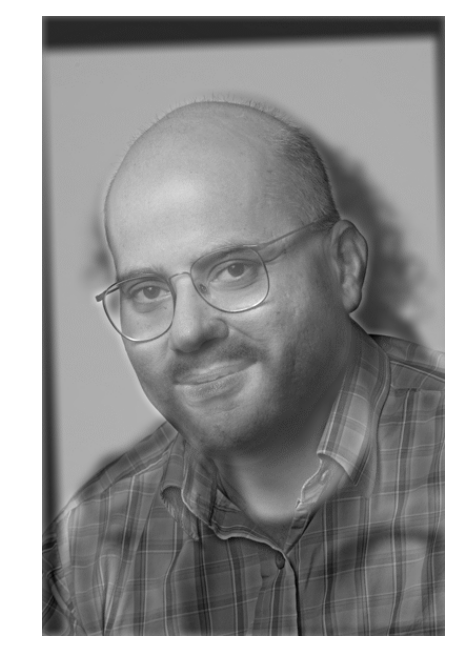

In [7]:
%matplotlib inline 
plt.figure(figsize=(6,8))
plt.gray()
plt.imshow(hybrid[:,:,0])
plt.axis('off')

(-0.5, 382.5, 590.5, -0.5)

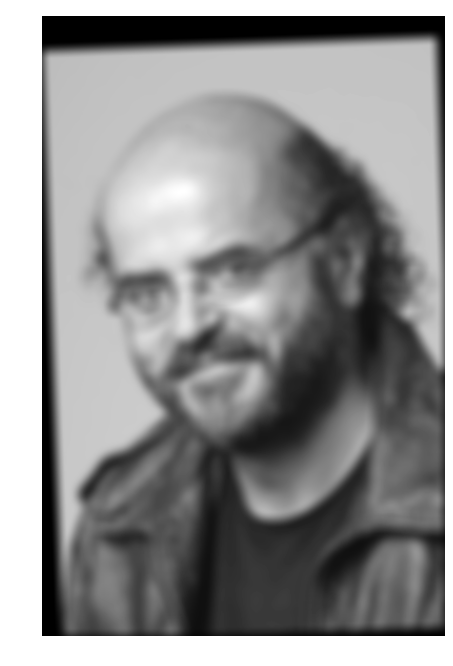

In [8]:
plt.figure(figsize=(6,8))
plt.gray()
plt.imshow(im_low[:,:,0])
plt.axis('off')

(-0.5, 382.5, 590.5, -0.5)

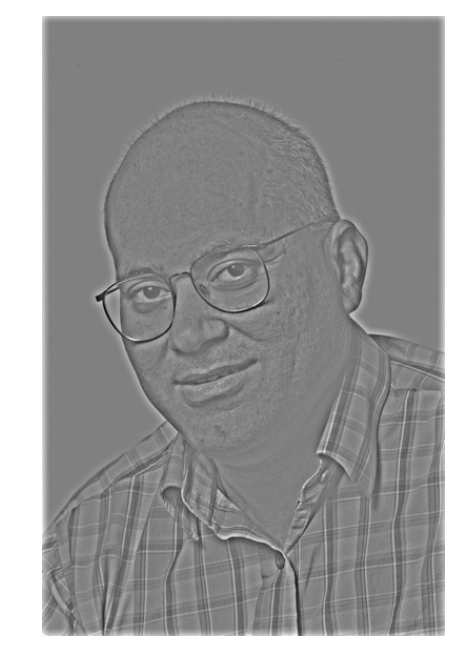

In [9]:
plt.figure(figsize=(6,8))
plt.gray()
plt.imshow(im_high[:,:,0])
plt.axis('off')

# 2. FFT

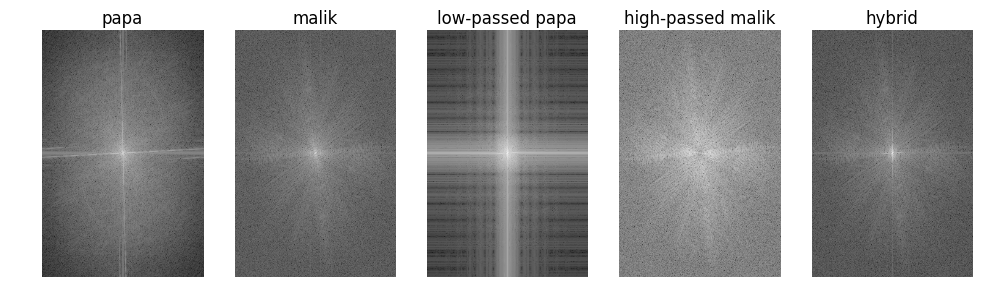

In [10]:
plt.figure(figsize=(12,6))
plt.subplot(151)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im1_gray[:,:,0])))))
plt.title("papa")
plt.axis('off')
plt.subplot(152)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im2_gray[:,:,0])))))
plt.title("malik")
plt.axis('off')
plt.subplot(153)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im_low[:,:,0])))))
plt.title("low-passed papa")
plt.axis('off')
plt.subplot(154)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im_high[:,:,0])))))
plt.title("high-passed malik")
plt.axis('off')
plt.subplot(155)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(hybrid[:,:,0])))))
plt.title("hybrid")
plt.axis('off')
plt.show()

# 3. Pyramid

- Gaussian Pyramid

In [11]:
gaussian_pyramid = pyramid(hybrid, 5, 7, 12, 2, low_pass_filter)

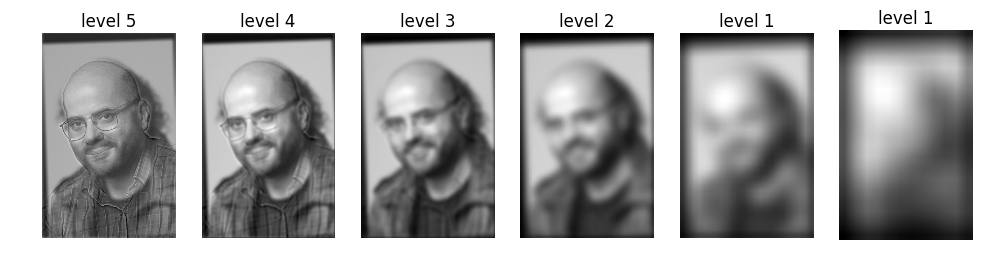

In [12]:
plt.figure(figsize=(12,6))
plt.subplot(161)
plt.gray()
plt.imshow(gaussian_pyramid[0][:,:,0])
plt.title("level 5")
plt.axis('off')
plt.subplot(162)
plt.gray()
plt.imshow(gaussian_pyramid[1][:,:,0])
plt.title("level 4")
plt.axis('off')
plt.subplot(163)
plt.gray()
plt.imshow(gaussian_pyramid[2][:,:,0])
plt.title("level 3")
plt.axis('off')
plt.subplot(164)
plt.gray()
plt.imshow(gaussian_pyramid[3][:,:,0])
plt.title("level 2")
plt.axis('off')
plt.subplot(165)
plt.gray()
plt.imshow(gaussian_pyramid[4][:,:,0])
plt.title("level 1")
plt.axis('off')
plt.subplot(166)
plt.gray()
plt.imshow(gaussian_pyramid[5][:,:,0])
plt.title("level 1")
plt.axis('off')
plt.show()

- Laplacian Pyramid

In [13]:
laplacian_pyramid = pyramid(hybrid, 5, 17, 5, 2, high_pass_filter)

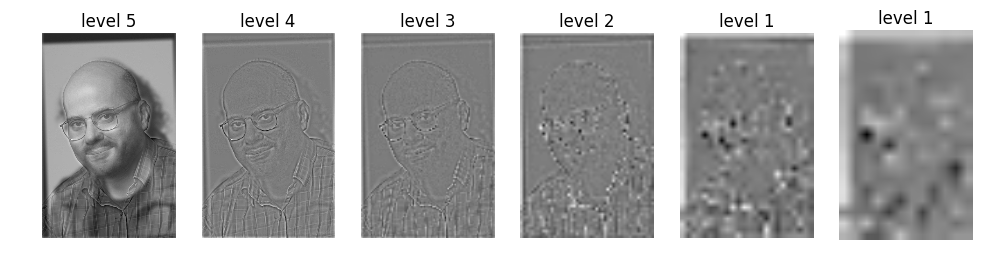

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(161)
plt.gray()
plt.imshow(laplacian_pyramid[0][:,:,0])
plt.title("level 5")
plt.axis('off')
plt.subplot(162)
plt.gray()
plt.imshow(laplacian_pyramid[1][:,:,0])
plt.title("level 4")
plt.axis('off')
plt.subplot(163)
plt.gray()
plt.imshow(laplacian_pyramid[2][:,:,0])
plt.title("level 3")
plt.axis('off')
plt.subplot(164)
plt.gray()
plt.imshow(laplacian_pyramid[3][:,:,0])
plt.title("level 2")
plt.axis('off')
plt.subplot(165)
plt.gray()
plt.imshow(laplacian_pyramid[4][:,:,0])
plt.title("level 1")
plt.axis('off')
plt.subplot(166)
plt.gray()
plt.imshow(laplacian_pyramid[5][:,:,0])
plt.title("level 1")
plt.axis('off')
plt.show()

# 4. More Results

An example that does not work well. 
The kitten image
<img src="kitten.jpg">
The puppy image
<img src="puppy.jpg">
Hybrid image
<img src="kiten_puppy_hybrid.png">
Laplacian pyramid
<img src="laplacian_kitten_puppy.png">
Gaussian pyramid
<img src="gaussian_kitten_puppy.png">


An example that works well. 
Trump
<img src="trump.jpg">
Obama
<img src="obama.jpg">
Hybrid image
<img src="trump_obama_hybrid.png">
Laplacian pyramid
<img src="laplacian_obama_trump.png">
Gaussian pyramid
<img src="gaussian_obama_trump.png">